# Task 1

### ML: P-Prog: Model Fitting

In [43]:
# Import libraies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 15
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size

# a. Read csv file(TestParam.csv)

In [4]:
data=pd.read_csv("../Data/TestParam.csv")

In [5]:
data.head(2)

,label,param0,param1,param2,param3,param4,param5,param6,param7,param8,...,param774,param775,param776,param777,param778,param779,param780,param781,param782,param783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.shape

(42000, 785)

In [8]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# b. Create test/training sample set

In [32]:
# train-test split 
X=data.drop('label',axis=1).values
Y=data.label.values
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed,stratify=Y)

# c. Train model on training data

In [33]:
model=LGBMClassifier(learning_rate =0.01, n_estimators=1000, colsample_bytree=0.8,importance_type='split', max_depth=50,min_child_samples=2, min_child_weight=1, min_split_gain=0.1,n_jobs=7, num_leaves=3, objective='binary',random_state=42, reg_alpha=0.1, reg_lambda=0.1,subsample=0.5,verbosity=3)

In [34]:
model.fit(X_train,y_train)

LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=50,
               min_child_samples=2, min_child_weight=1, min_split_gain=0.1,
               n_estimators=1000, n_jobs=7, num_leaves=3, objective='binary',
               random_state=42, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5,
               verbosity=3)

# d. Predict label for test data ( Label is outcome)

In [35]:
predicted = model.predict(X_test)

# e. Show accuracy of model.

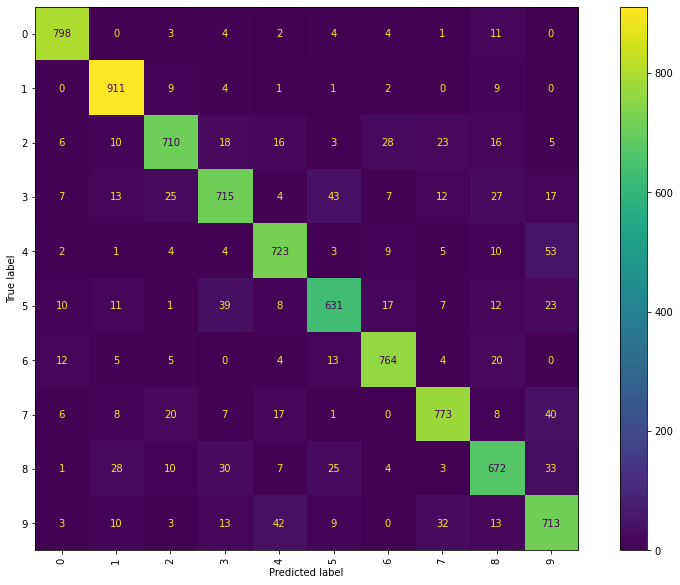

In [44]:
cm = confusion_matrix(y_test, predicted)
unique_label = np.unique([y_test, predicted])
cmd = ConfusionMatrixDisplay(cm, display_labels=unique_label)
cmd.plot(xticks_rotation='vertical')

In [47]:
from pprint import pprint
pprint(classification_report(y_test, predicted))

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.94      0.96      0.95       827\n'
 '           1       0.91      0.97      0.94       937\n'
 '           2       0.90      0.85      0.87       835\n'
 '           3       0.86      0.82      0.84       870\n'
 '           4       0.88      0.89      0.88       814\n'
 '           5       0.86      0.83      0.85       759\n'
 '           6       0.91      0.92      0.92       827\n'
 '           7       0.90      0.88      0.89       880\n'
 '           8       0.84      0.83      0.83       813\n'
 '           9       0.81      0.85      0.83       838\n'
 '\n'
 '    accuracy                           0.88      8400\n'
 '   macro avg       0.88      0.88      0.88      8400\n'
 'weighted avg       0.88      0.88      0.88      8400\n')


In [46]:
print(f"Accuracy : {accuracy_score(y_test, predicted)}")

Accuracy : 0.8821428571428571


# The End